- générer un signal synthétique d'un oscillateur non linéaire amorti
- tracer la période en fonction de l'amplitude.
On utilisera `from scipy.signal import argrelmax` 
- comparer avec la formule de Borda:
$$ T = T_0\left( 1 + \frac{\theta^2}{16} \right) $$
- comparer à la formule analytique
$$ T = \frac{2}{\pi}T_0\int_0^{\pi/2}\frac{\mathrm{d}\phi}{\sqrt{1-k^2\sin^2\phi}} $$

In [1]:
import matplotlib
matplotlib.use('nbagg')

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def equation_vectorielle(theta_thetadot, t):
    theta, theta_dot = theta_thetadot
    return [theta_dot, -0.01*theta_dot-np.sin(theta)]
t = np.linspace(0, 100*np.pi, 10000)
theta_thetadot_initial = (0.95*np.pi, 0)
solution = odeint(equation_vectorielle, theta_thetadot_initial, t)
theta, theta_dot = solution.T

<IPython.core.display.Javascript object>


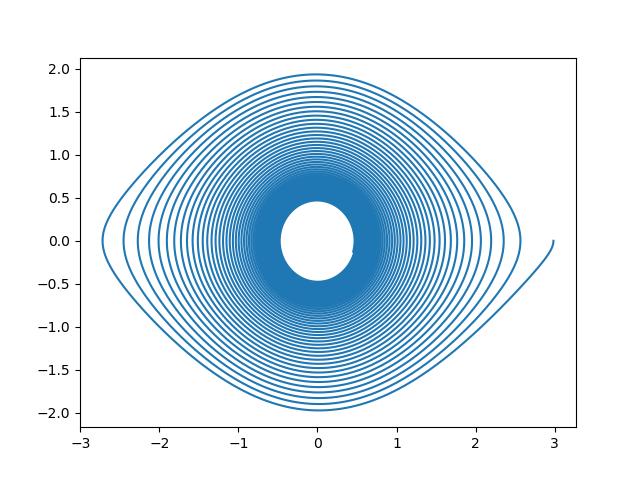

In [3]:
plt.figure()
plt.plot(theta, theta_dot)
plt.show()

<IPython.core.display.Javascript object>


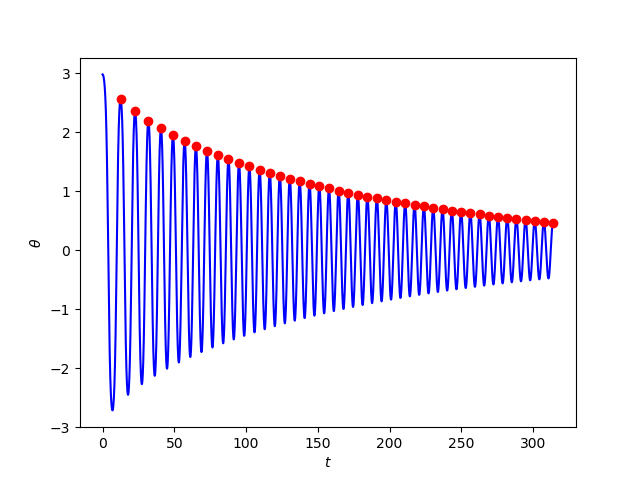

In [4]:
from scipy.signal import argrelmax
ind = argrelmax(theta)

plt.figure()
plt.plot(t, theta, 'b-')
plt.plot(t[ind], theta[ind], 'ro')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()

<IPython.core.display.Javascript object>


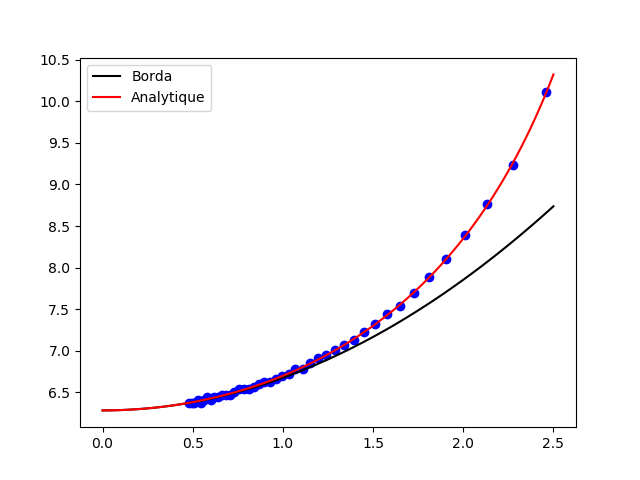

In [5]:
from scipy.integrate import quad

T = np.diff(t[ind])
ampl = (theta[ind][:-1] + theta[ind][1:])/2.
plt.figure()
plt.plot(ampl, T, 'bo')
# Borda
T0 = 2*np.pi
aa = np.linspace(0.0, 2.5, 100)
plt.plot(aa, T0*(1+aa**2/16), 'k-', label="Borda")
# Formule analytique
def T_analytique(amplitude):
    if isinstance(amplitude, np.ndarray):
        return np.array([T_analytique(a) for a in amplitude])
    k = np.sin(amplitude/2.)
    value, err = quad(lambda phi: 1./(1-k**2*np.sin(phi)**2)**(0.5), 0.0, 2*np.pi)
    return value
plt.plot(aa, T_analytique(aa), 'r-', label="Analytique")    
plt.legend()
plt.show()